In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
train= pd.read_csv('./train.csv')

In [3]:
train.shape

(614, 13)

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
train = train.drop(columns=['Loan_ID'])

In [8]:
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

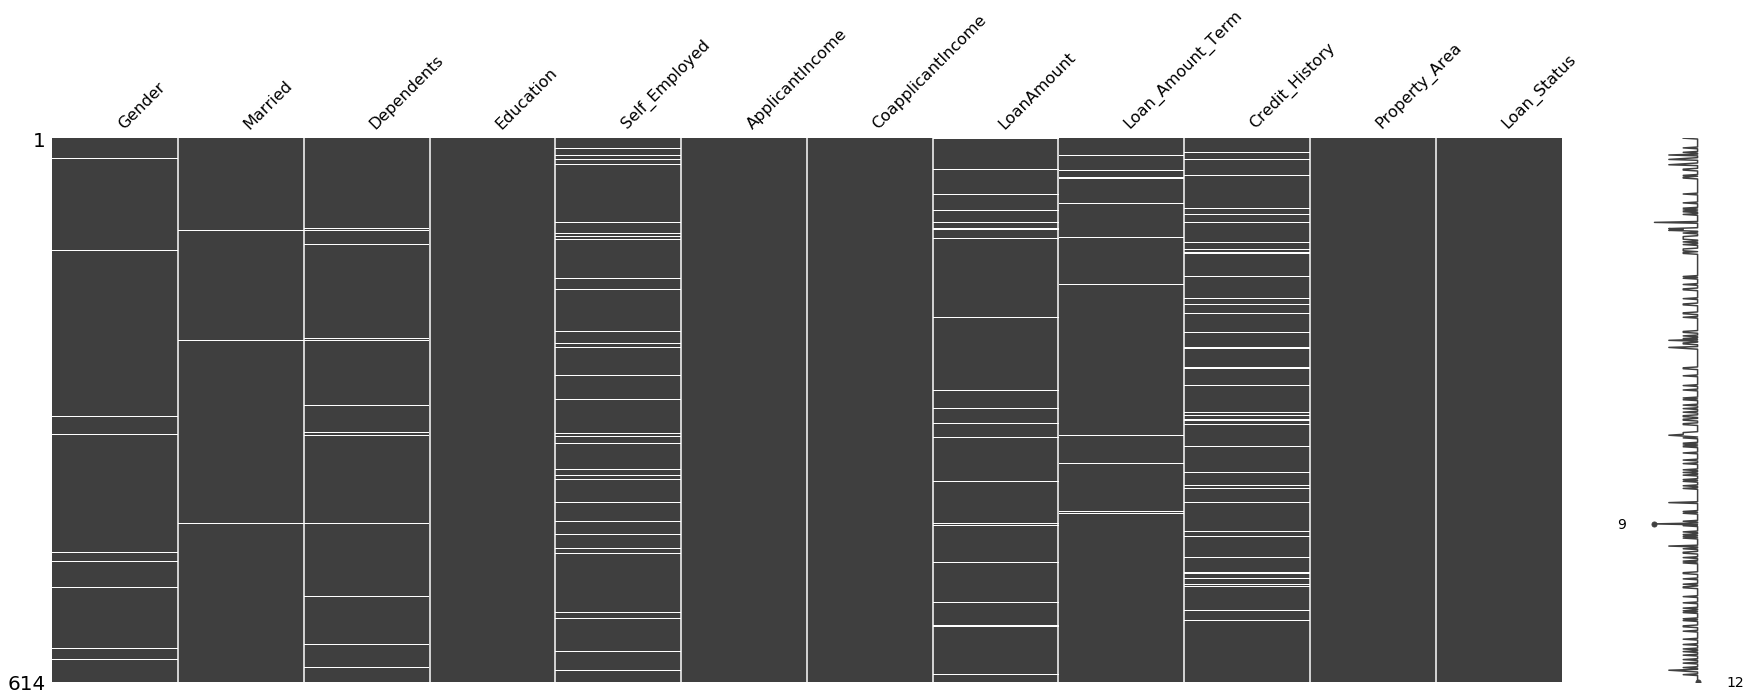

In [9]:
missingno.matrix(train, figsize = (30,10))

#### Handling missing values

There are missing values in 'Gender','Married','Dependents','Self-Employed','LoanAmount','Loan_Amount_Term','Credit_History'

In [10]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
train['Gender'].fillna("Male",inplace=True)

In [12]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
train['Married'].fillna("Yes",inplace=True)

In [14]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [16]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
train['Self_Employed'].fillna("No",inplace=True)

In [18]:
train['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [19]:
train['Credit_History'].fillna(1.0,inplace=True)

In [20]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())

#### Univariate Analysis

Text(0.5, 1.0, 'Loan Status')

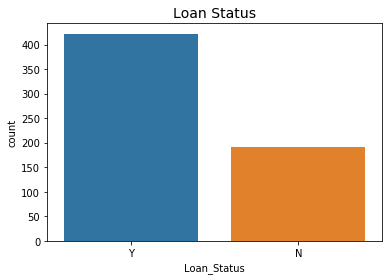

In [21]:
sns.countplot(train['Loan_Status'])
plt.title("Loan Status", fontsize=14)

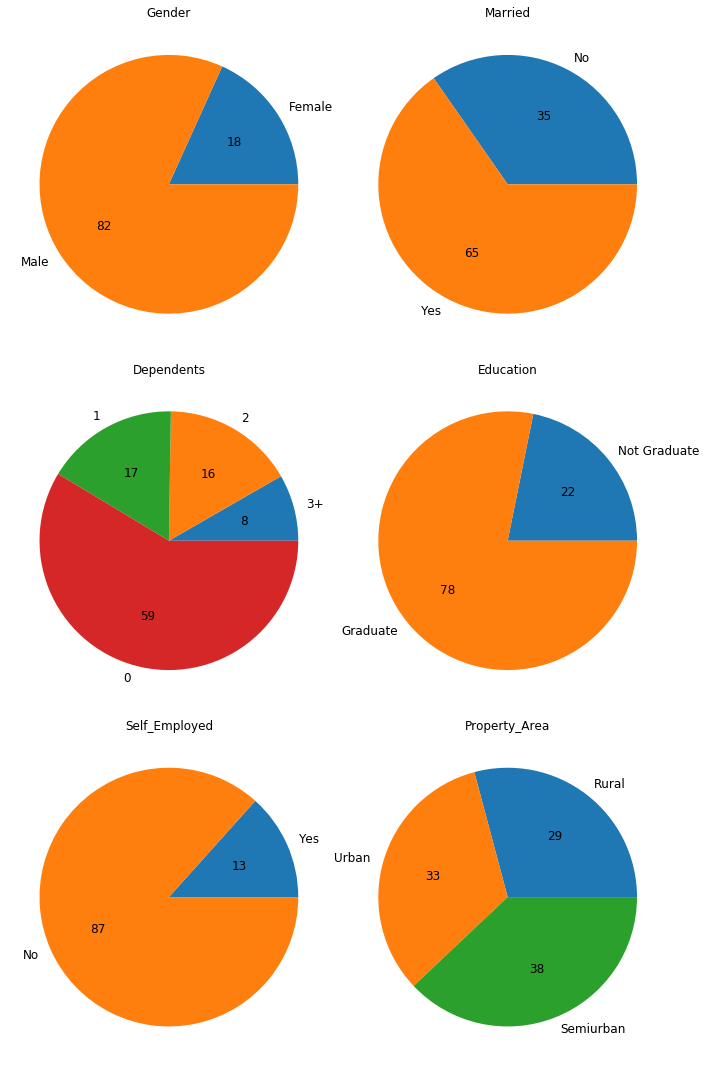

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    axes[i].set_ylabel('')
    
plt.tight_layout()

#### Bivariate Analysis

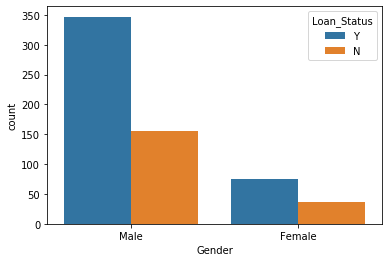

In [23]:
sns.countplot(x ='Gender', hue = "Loan_Status", data = train)
 
# Show the plot
plt.show()

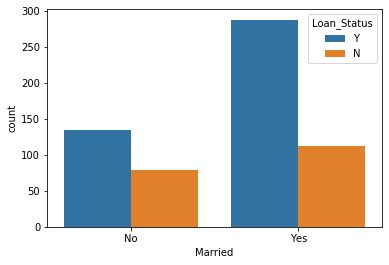

In [24]:
sns.countplot(x ='Married', hue = "Loan_Status", data = train)
 
# Show the plot
plt.show()

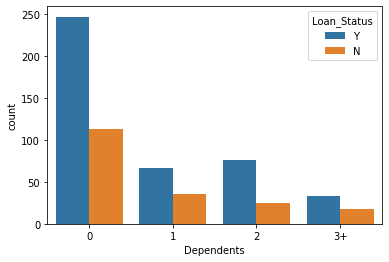

In [25]:
sns.countplot(x ='Dependents', hue = "Loan_Status", data = train)
 
# Show the plot
plt.show()

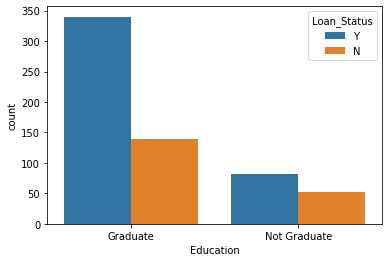

In [26]:
sns.countplot(x ='Education', hue = "Loan_Status", data = train)
 
# Show the plot
plt.show()

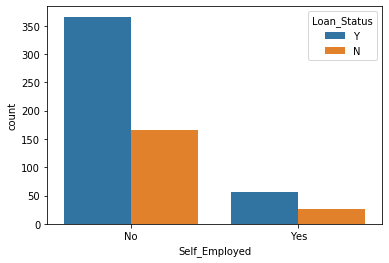

In [27]:
sns.countplot(x ='Self_Employed', hue = "Loan_Status", data = train)
 
# Show the plot
plt.show()

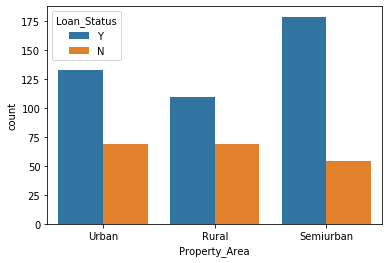

In [28]:
sns.countplot(x ='Property_Area', hue = "Loan_Status", data = train)
 
# Show the plot
plt.show()

#### Bivariate Analysis of Numerical Column

In [29]:
print(train[num_cols].describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


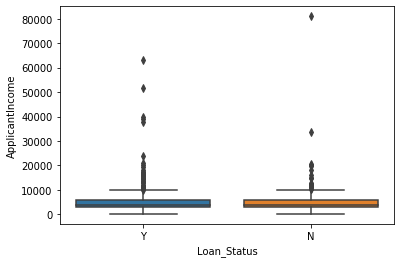

In [30]:
ax = sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=train)

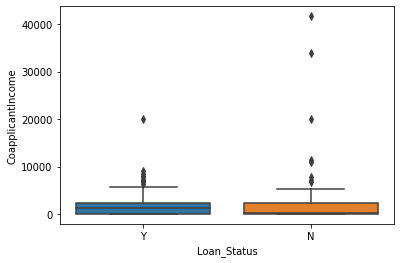

In [31]:
ax = sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=train)

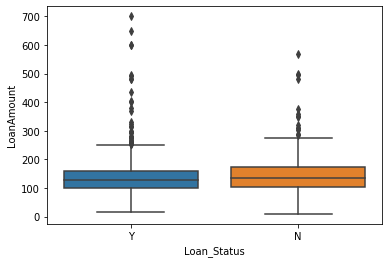

In [32]:
ax = sns.boxplot(x="Loan_Status", y="LoanAmount", data=train)

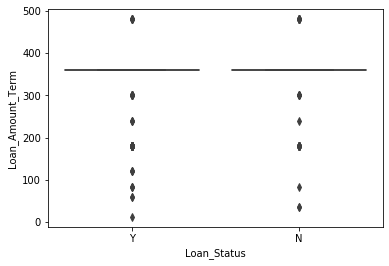

In [33]:
ax = sns.boxplot(x="Loan_Status", y="Loan_Amount_Term", data=train)

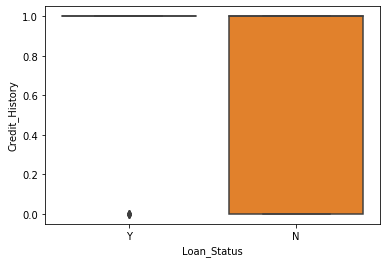

In [34]:
ax = sns.boxplot(x="Loan_Status", y="Credit_History", data=train)

In [35]:
le=LabelEncoder()
train['Loan_Status']=le.fit_transform(train['Loan_Status'])

In [36]:
var= cat_cols

for i in var:
    train[i]=le.fit_transform(train[i])

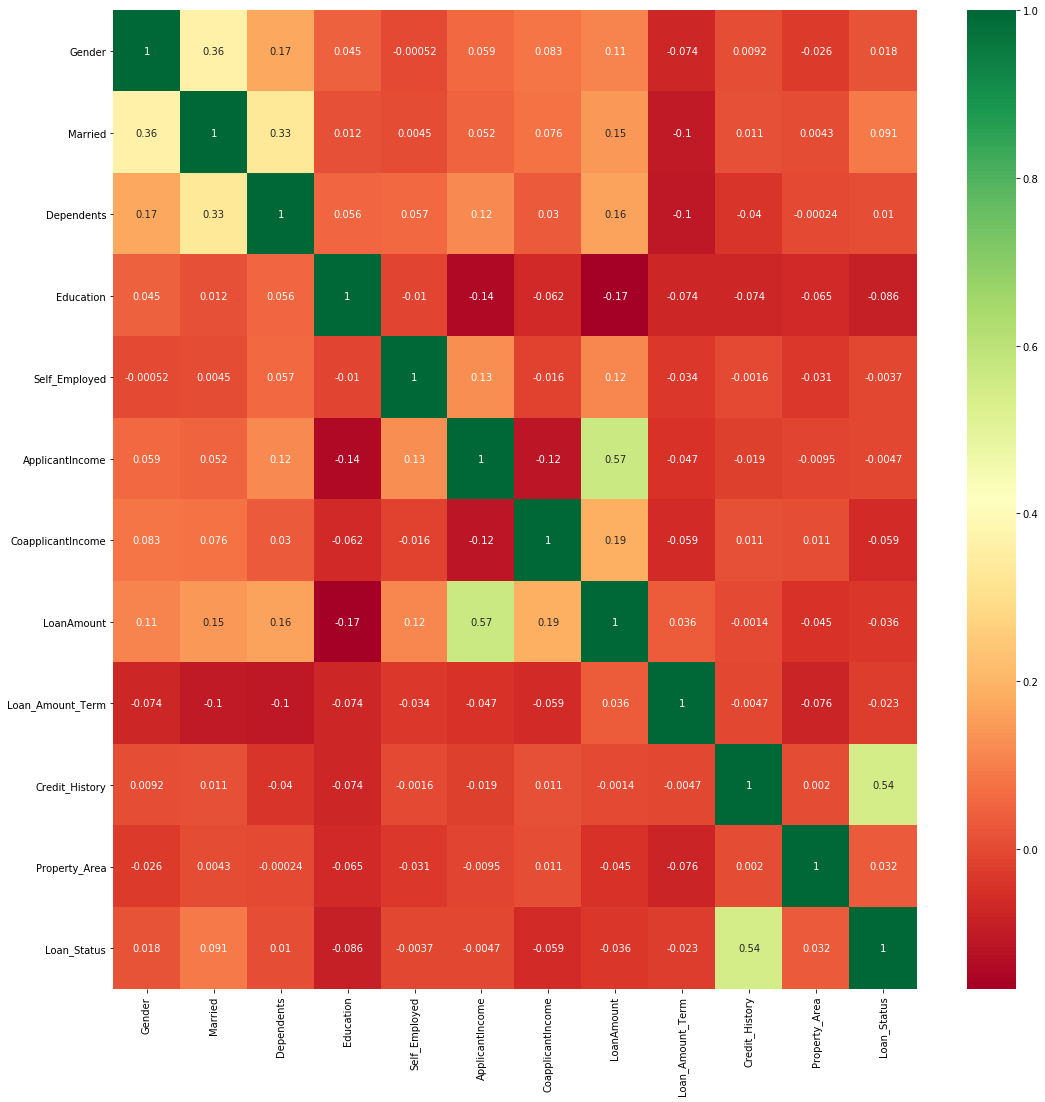

In [37]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

From the corelation plot we can see that no two independent variables have even 0.6 corelation. Thus we assume that all independent variables are independently contributing to the dependent variable

#### Distribution plots

Before training the model let's check normal distribution curve 

Text(0.5, 0, 'Applicant Income')

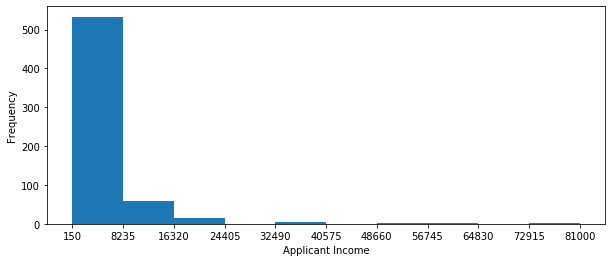

In [38]:
count,bin_edges=np.histogram(train['ApplicantIncome'])
train['ApplicantIncome'].plot(kind='hist',xticks=bin_edges,figsize=(10,4))
plt.xlabel("Applicant Income")

Since the distribution is left skewed, let's apply log transform to get better statistical analysis for our models

Text(0.5, 0, 'Coapplicant Income')

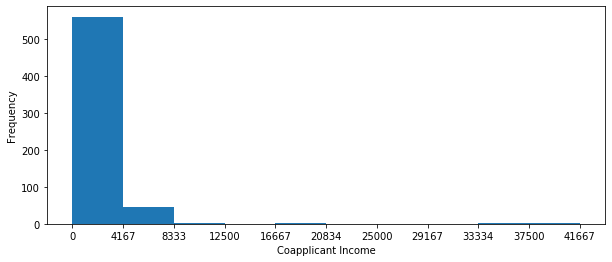

In [39]:
count,bin_edges=np.histogram(train['CoapplicantIncome'])
train['CoapplicantIncome'].plot(kind='hist',xticks=bin_edges,figsize=(10,4))
plt.xlabel("Coapplicant Income")

Since some of the values in Applicant Income and Coapplicant Income is 0. lets us club ApplicantIncome and Coapplicant Income together and apply the log transform 

In [40]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']

In [41]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [42]:
train['TotalIncome']=np.log(train['TotalIncome'])

Text(0.5, 0, 'Total Income')

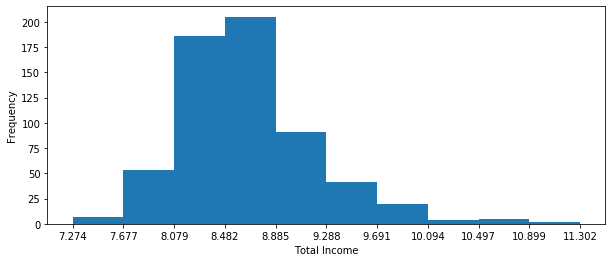

In [43]:
count,bin_edges=np.histogram(train['TotalIncome'])
train['TotalIncome'].plot(kind='hist',xticks=bin_edges,figsize=(10,4))
plt.xlabel("Total Income")

Text(0.5, 0, 'Loan Amount')

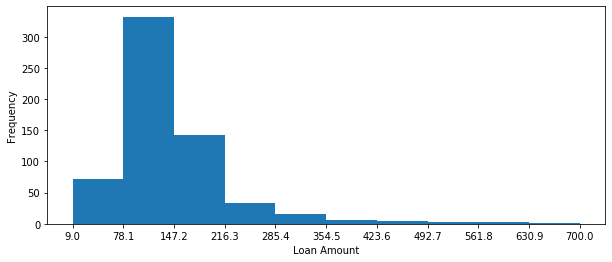

In [44]:
count,bin_edges=np.histogram(train['LoanAmount'])
train['LoanAmount'].plot(kind='hist',xticks=bin_edges,figsize=(10,4))
plt.xlabel("Loan Amount")

In [45]:
train['LoanAmount']=np.log(train['LoanAmount'])

Text(0.5, 0, 'Loan Amount')

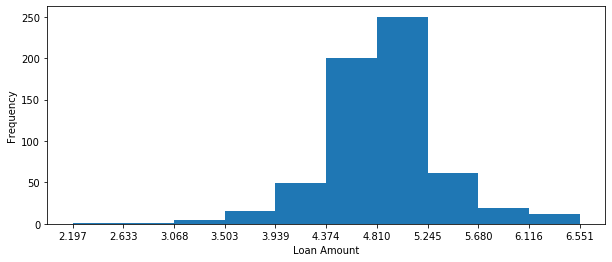

In [46]:
count,bin_edges=np.histogram(train['LoanAmount'])
train['LoanAmount'].plot(kind='hist',xticks=bin_edges,figsize=(10,4))
plt.xlabel("Loan Amount")

In [47]:
train = train.drop(columns=['ApplicantIncome','CoapplicantIncome'])

In [48]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,4.986426,360.0,1.0,2,1,8.674026
1,1,1,1,0,0,4.852030,360.0,1.0,0,0,8.714568
2,1,1,0,0,1,4.189655,360.0,1.0,2,1,8.006368
3,1,1,0,1,0,4.787492,360.0,1.0,2,1,8.505323
4,1,0,0,0,0,4.948760,360.0,1.0,2,1,8.699515


In [49]:
def classification_model(model,data,independent,dependent):
     #Fit the model
    model.fit(data[independent],data[dependent])
    
     #Making Predictions on Training Set
    predictions=model.predict(data[independent])
    
    #Printing Model Accuracy
    accuracy = metrics.accuracy_score(predictions,data[dependent])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
     #Perform K-Fold cross validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    
    for train,test in kf.split(data[independent]):
        
        #Filter Training Data
        train_predictors = (data[independent].iloc[train,:])
    
        # The target we are using to train the algorithm.
        train_target = data[dependent].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[independent].iloc[test,:], data[dependent].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[independent],data[dependent])

In [53]:
outcome = 'Loan_Status'
model = LogisticRegression()
independent_var = ['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome']
classification_model(model, train,independent_var,outcome)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [54]:
outcome = 'Loan_Status'
model = LogisticRegression()
independent_var = ['Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','TotalIncome']
classification_model(model, train,independent_var,outcome)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [55]:
model = DecisionTreeClassifier()
independent_var = ['Self_Employed','LoanAmount','Credit_History','Loan_Amount_Term','Property_Area','TotalIncome']
classification_model(model, train,independent_var,outcome)

Accuracy : 100.000%
Cross-Validation Score : 68.894%


So far logistic Regression model is doing great 

In [56]:
outcome = 'Loan_Status'
model = RandomForestClassifier(n_estimators=100)
independent_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount','TotalIncome']
classification_model(model, train,independent_var,outcome)

Accuracy : 100.000%
Cross-Validation Score : 78.670%


In [57]:
model = RandomForestClassifier(n_estimators=100)
independent_var = ['Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount','TotalIncome']
classification_model(model, train,independent_var,outcome)

Accuracy : 100.000%
Cross-Validation Score : 76.868%


### Conclusion 
Logistic Regression performs well on the data with 81% accuracy and 81% cross validation score 